In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [65]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Chicago_ward/Crime_Type_per_Month_by_Ward.csv")

In [50]:
# Placeholder DataFrame for demonstration
data = {
    "Date": pd.date_range(start="2003-12-01", end="2023-12-01", freq='M'),
    "Ward": [40]*240,
    "Primary_Type": ["Assault", "Battery", "Robbery", "Homicide", "Kidnapping", "Sexual assault"]*40,
    "Incidents": [100, 120, 80, 5, 3, 30]*40
}
df = pd.DataFrame(data)
df

,Date,Ward,Primary_Type,Incidents
0,2003-12-31,40,Assault,100
1,2004-01-31,40,Battery,120
2,2004-02-29,40,Robbery,80
3,2004-03-31,40,Homicide,5
4,2004-04-30,40,Kidnapping,3
...,...,...,...,...
235,2023-07-31,40,Battery,120
236,2023-08-31,40,Robbery,80
237,2023-09-30,40,Homicide,5
238,2023-10-31,40,Kidnapping,3


In [51]:
# Filter data based on 'Primary_Type'
filtered_df = df[
    (df["Ward"] == 40) &
    (df["Primary_Type"].isin(["Assault", "Battery", "Robbery", "Homicide", "Kidnapping", "Sexual assault"])) &
    (df["Date"] >= pd.to_datetime("2003-12-01")) &
    (df["Date"] <= pd.to_datetime("2023-12-01"))
]
filtered_df

,Date,Ward,Primary_Type,Incidents
0,2003-12-31,40,Assault,100
1,2004-01-31,40,Battery,120
2,2004-02-29,40,Robbery,80
3,2004-03-31,40,Homicide,5
4,2004-04-30,40,Kidnapping,3
...,...,...,...,...
235,2023-07-31,40,Battery,120
236,2023-08-31,40,Robbery,80
237,2023-09-30,40,Homicide,5
238,2023-10-31,40,Kidnapping,3


In [52]:
# Group by week and crime type, then count the incidents
weekly_df = filtered_df.groupby([pd.Grouper(key='Date', freq='W'), 'Primary_Type']).size().unstack(fill_value=0)

# Smoothing (e.g., 4-week rolling average)
smoothed_df = weekly_df.rolling(window=4).mean()


In [53]:
# Resample to weekly data
weekly_df = filtered_df.resample('W', on='Date').sum()

# Smoothing (e.g., 4-week rolling average)
smoothed_df = weekly_df.rolling(window=4).mean()

<ipython-input-53-70b8a93726db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df = filtered_df.resample('W', on='Date').sum()


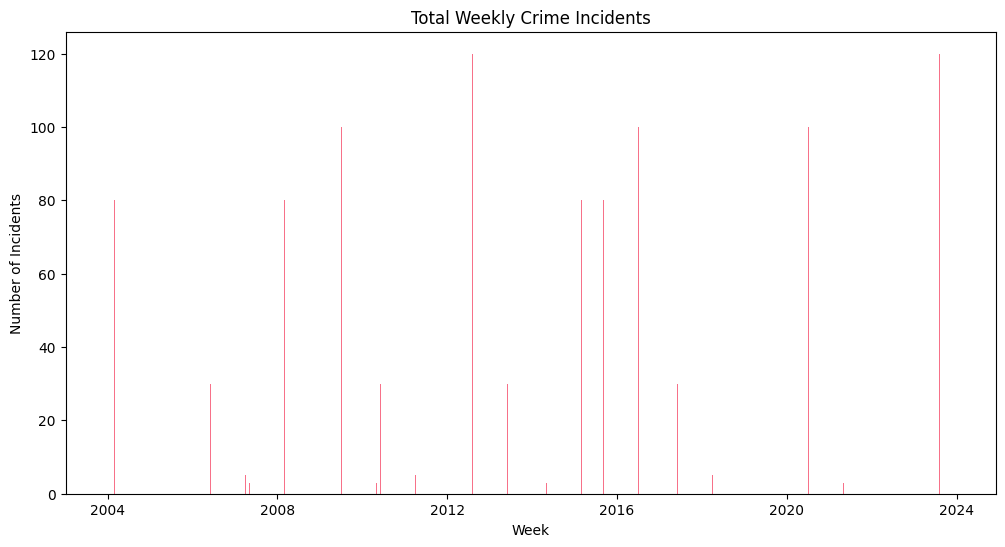

In [56]:
# Assuming 'weekly_df' is already defined as in your snippet
plt.figure(figsize=(12, 6))
plt.bar(weekly_df.index, weekly_df['Incidents'])
plt.title("Total Weekly Crime Incidents")
plt.xlabel("Week")
plt.ylabel("Number of Incidents")
plt.show()

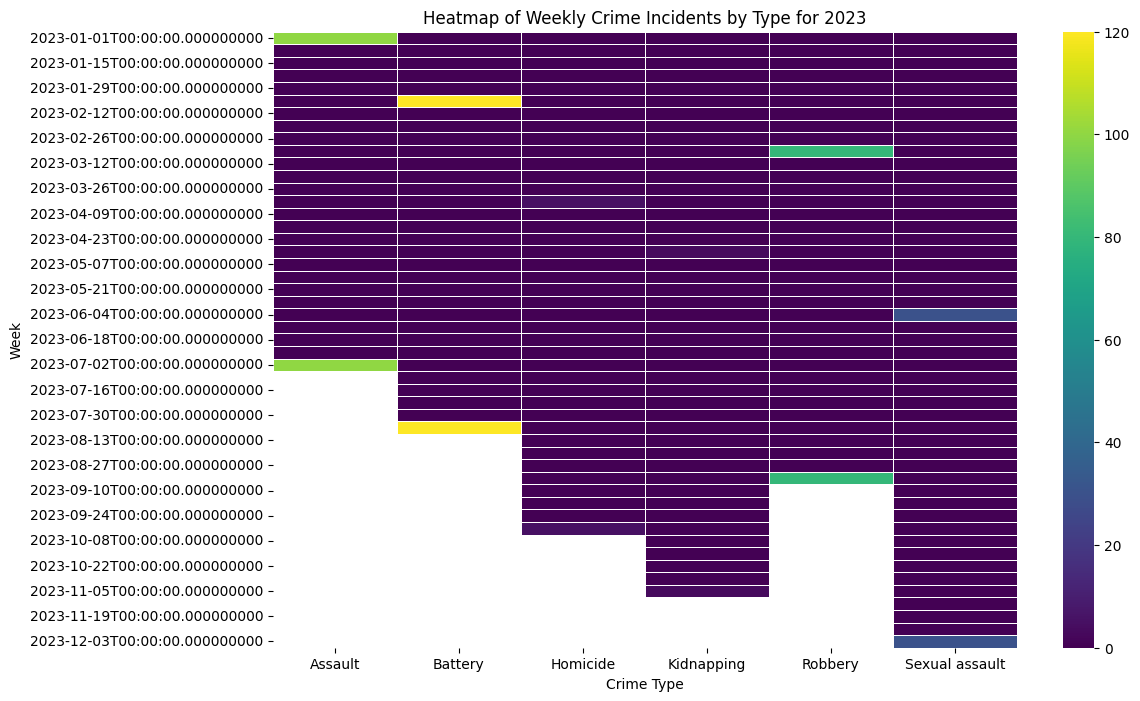

In [61]:
# Assuming filtered_df has a 'Date' column of datetime type, a 'Primary_Type' column for crime types,
# and an 'Incidents' column indicating the number of incidents.

# First, we'll group by 'Primary_Type' and resample by week on 'Date', summing the 'Incidents'.
weekly_incidents = filtered_df.groupby('Primary_Type').resample('W', on='Date')['Incidents'].sum().reset_index()

# Now we pivot this DataFrame to get 'Primary_Type' as columns, 'Date' as rows.
pivot_table = weekly_incidents.pivot(index='Date', columns='Primary_Type', values='Incidents')

# Since there are many weeks, it's better to show data for a year for clarity.
# You can adjust the date range as needed.
pivot_table = pivot_table.loc['2023']

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap="viridis", linewidths=.5)
plt.title("Heatmap of Weekly Crime Incidents by Type for 2023")
plt.ylabel("Week")
plt.xlabel("Crime Type")
plt.show()

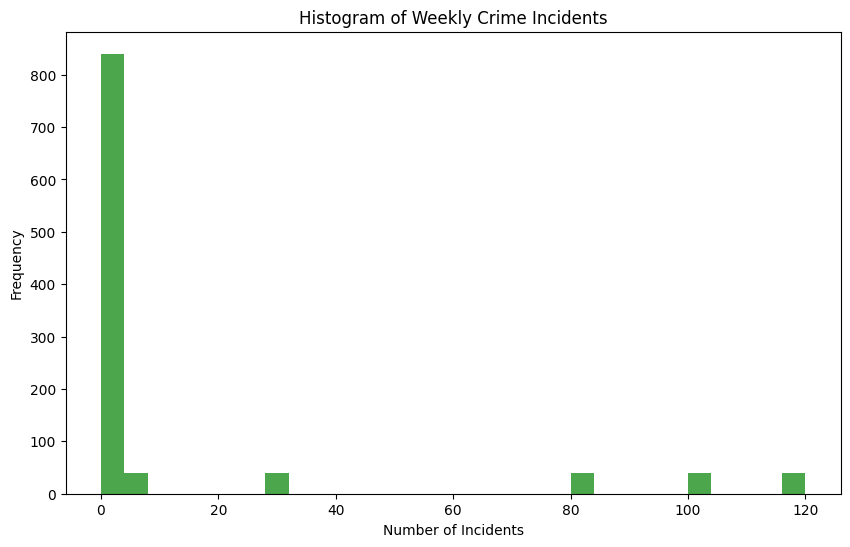

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_df['Incidents'], bins=30, alpha=0.7, color='green')
plt.title("Histogram of Weekly Crime Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Frequency")
plt.show()


<ipython-input-38-14d563138439>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_totals_weekly = grouped.apply(lambda x: x.resample('W', on='Date').sum())
<ipython-input-38-14d563138439>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_totals_weekly = grouped.apply(lambda x: x.resample('W', on='Date').sum())
<ipython-input-38-14d563138439>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_totals_weekly =

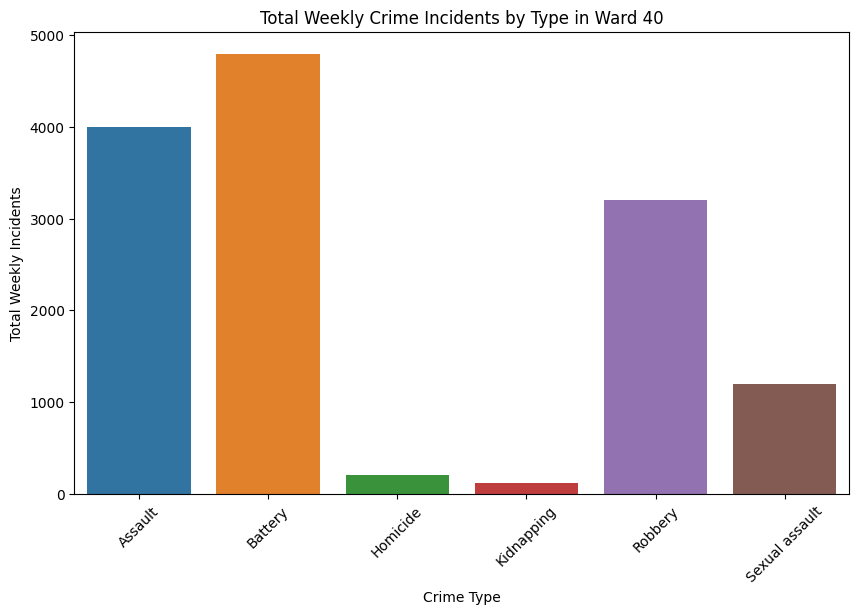

In [38]:
# Group by 'Primary_Type' and then resample each group by week
grouped = filtered_df.groupby('Primary_Type')
crime_totals_weekly = grouped.apply(lambda x: x.resample('W', on='Date').sum())

# Reset index to make 'Primary_Type' a column again
crime_totals_weekly = crime_totals_weekly.reset_index()

# Summing incidents by crime type over weeks
crime_totals = crime_totals_weekly.groupby('Primary_Type')['Incidents'].sum()

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_totals.index, y=crime_totals.values)
plt.title("Total Weekly Crime Incidents by Type in Ward 40")
plt.xlabel("Crime Type")
plt.ylabel("Total Weekly Incidents")
plt.xticks(rotation=45)
plt.show()


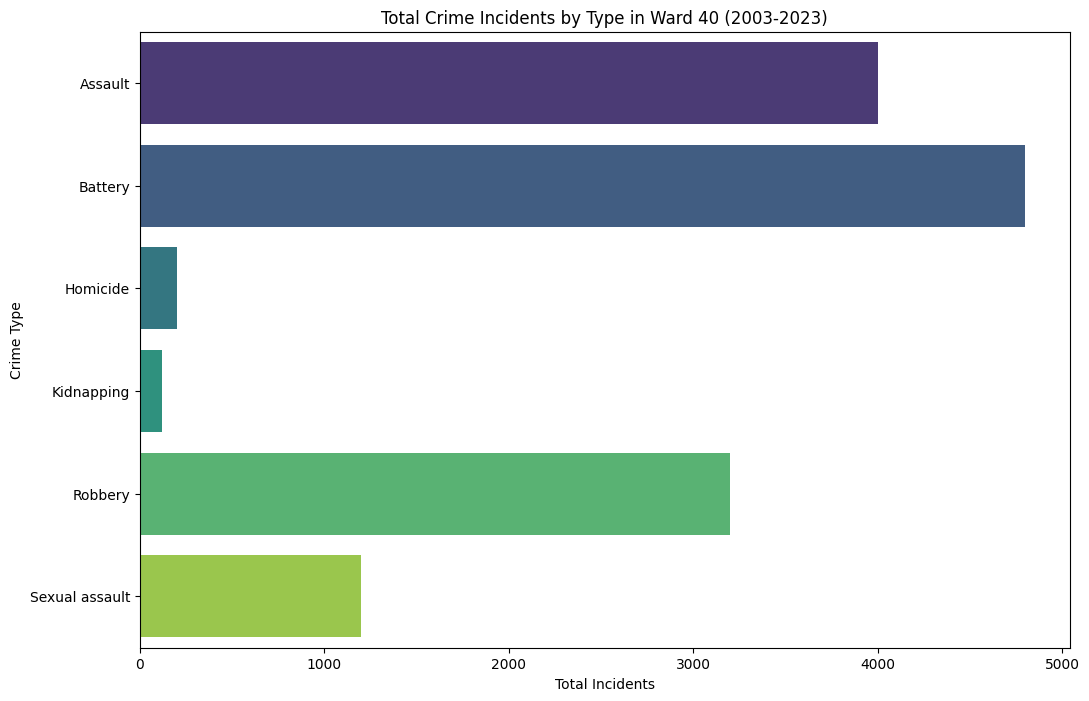

In [45]:
# # Grouping data and summing incidents by crime type
# crime_totals = filtered_df.groupby('Primary_Type')['Incidents'].sum().sort_values(ascending=False)

# Plotting the bar plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y=crime_totals.index, x=crime_totals.values, palette='viridis')

# Adding titles and labels for clarity
plt.title("Total Crime Incidents by Type in Ward 40 (2003-2023)")
plt.xlabel("Total Incidents")
plt.ylabel("Crime Type")

# Displaying the plot
plt.show()

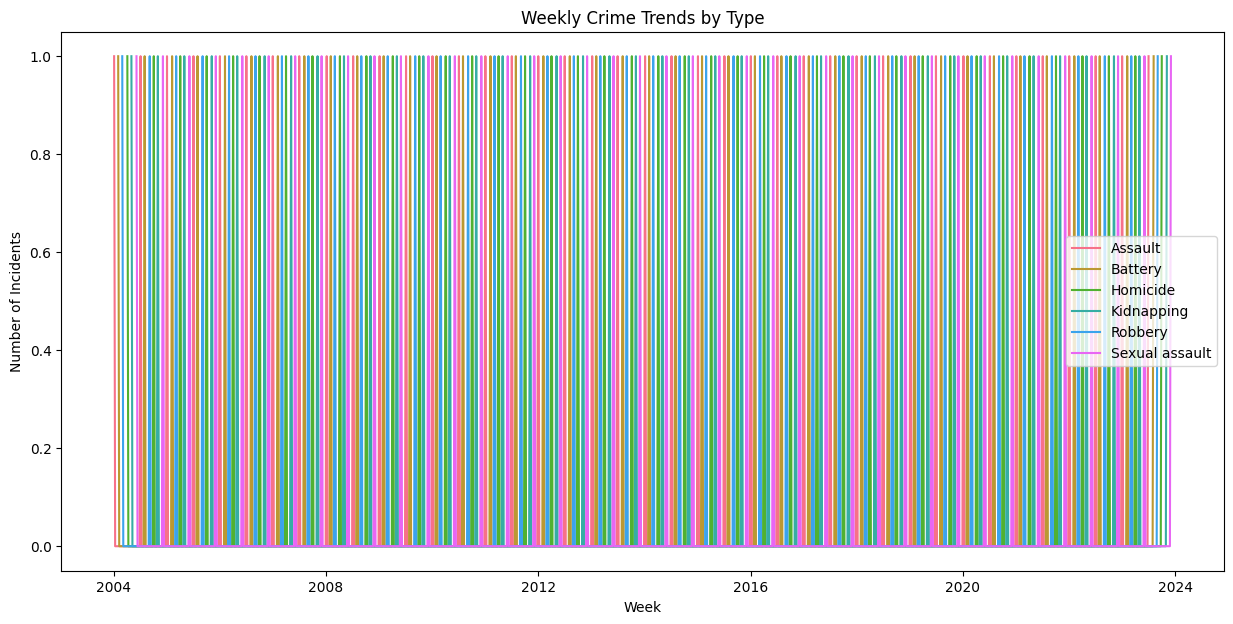

In [46]:
plt.figure(figsize=(15, 7))
for crime_type in weekly_data.columns:
    plt.plot(weekly_data.index, weekly_data[crime_type], label=crime_type)

plt.title("Weekly Crime Trends by Type")
plt.xlabel("Week")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()

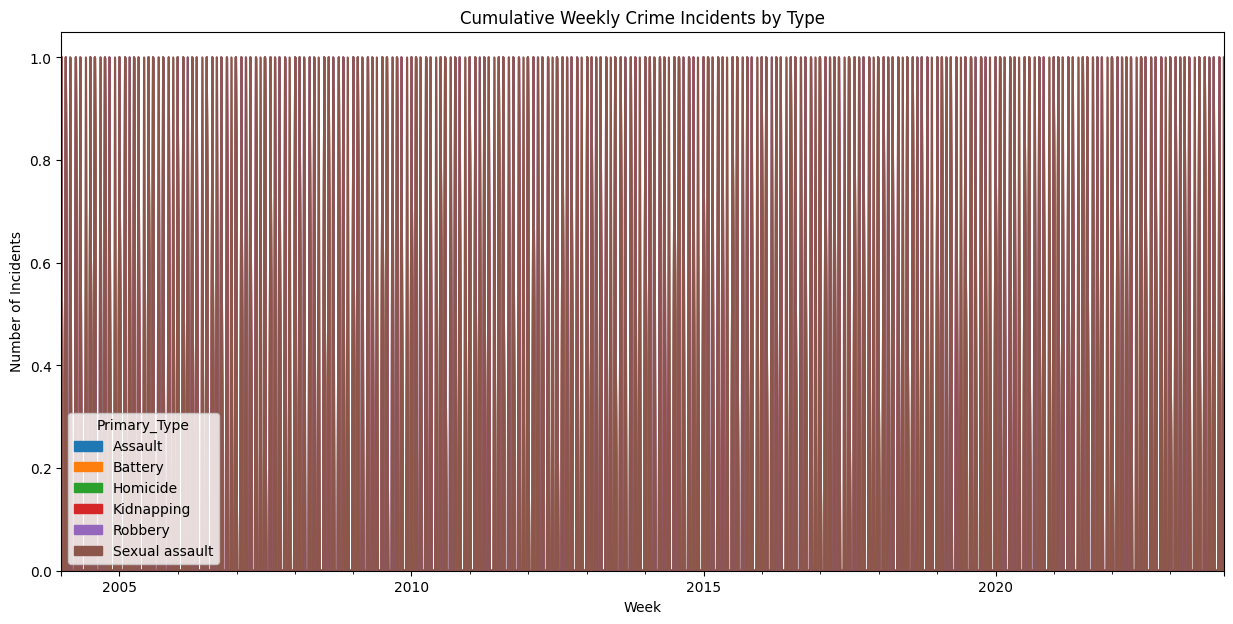

In [28]:
weekly_data.plot(kind='area', stacked=True, figsize=(15, 7))
plt.title("Cumulative Weekly Crime Incidents by Type")
plt.xlabel("Week")
plt.ylabel("Number of Incidents")
plt.show()

In [64]:
# Ensure your DataFrame 'filtered_df' has a datetime-like 'Date' column,
# a 'Primary_Type' column for crime types, and an 'Incidents' column indicating the number of incidents.

# Resample data by week and sum incidents
weekly_incidents = filtered_df.set_index('Date').groupby('Primary_Type').resample('W').sum().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(weekly_incidents, x='Date', y='Incidents', color='Primary_Type',
              title='Weekly Crime Incidents by Type Over Years',
              labels={'Incidents': 'Number of Incidents', 'Date': 'Date', 'Primary_Type': 'Crime Type'})

# Improve the layout
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Incidents', legend_title='Crime Type')

# Show the figure
fig.show()

<ipython-input-64-9da456c44294>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_incidents = filtered_df.set_index('Date').groupby('Primary_Type').resample('W').sum().reset_index()
<ipython-input-64-9da456c44294>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_incidents = filtered_df.set_index('Date').groupby('Primary_Type').resample('W').sum().reset_index()
<ipython-input-64-9da456c44294>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sho